# Problème 1 : Prédiction du Prix des Maisons (Machine Learning)

In [38]:
#Importations des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## Etape1: Exploration des Données

In [5]:
# Charger le fichier CSV en un DataFrame pandas
data = pd.read_csv('./data/housing.csv')
# Examination des 5 premiers lignes du DdataFrame pour voir la structure des données
print(data.head())
#vérification des valeurs manquantes
Empty_values = data.isnull().sum()
# print(Empty_values) 
''' D'après les resultats du print, il n'ya pas de valeur manquante pour le dataset'''
#Statistique descriptive (moyenne, ecart-type,quartiles)
descriptive_stats = data.describe()
print(descriptive_stats)

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


Création des graphiques pertinents
1.Histogrammes qui permettent de visualiser la distribution des valeurs pour chaque label (RM, LSTAT, PTRATIO, MEDV) 
2.

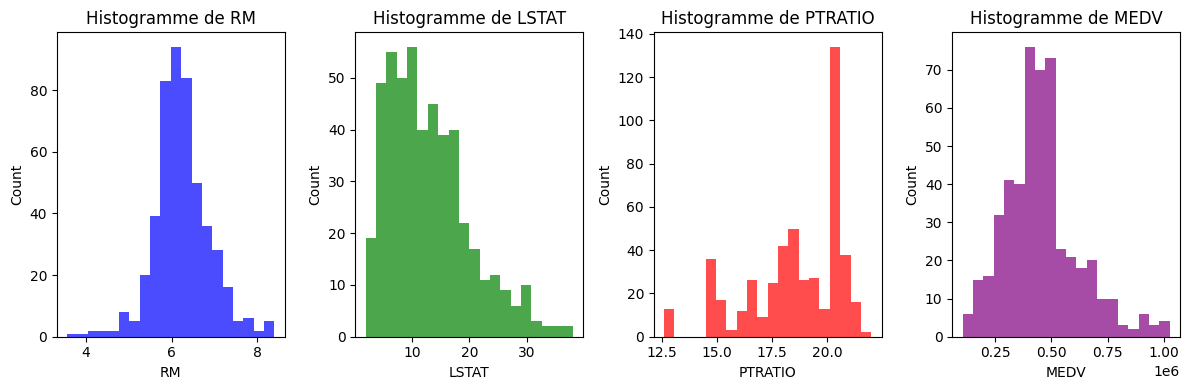

In [3]:

'''Histogrammes (RM, LSTAT, PTRATIO, MEDV) '''
# Création d'une figure pour stocker les histgogrammes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Histogramme de RM
axes[0].hist(data['RM'], bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel('RM')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogramme de RM')

# Histogramme de LSTAT
axes[1].hist(data['LSTAT'], bins=20, color='green', alpha=0.7)
axes[1].set_xlabel('LSTAT')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogramme de LSTAT')

# Histogramme de PTRATIO
axes[2].hist(data['PTRATIO'], bins=20, color='red', alpha=0.7)
axes[2].set_xlabel('PTRATIO')
axes[2].set_ylabel('Count')
axes[2].set_title('Histogramme de PTRATIO')

# Histogramme de MEDV
axes[3].hist(data['MEDV'], bins=20, color='purple', alpha=0.7)
axes[3].set_xlabel('MEDV')
axes[3].set_ylabel('Count')
axes[3].set_title('Histogramme de MEDV')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher les histogrammes
plt.show()

In [37]:
# Choix des caracteristiques pertinents pour la création du modèle (features)
X = data[['RM', 'LSTAT', 'PTRATIO']]
#target 
y = data['MEDV']
print(y)

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64


## Etape2: Modèle de Régression Linéaire

In [30]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        RM  LSTAT  PTRATIO
451  5.926  18.13     20.2
84   6.389   9.62     18.5
434  6.655  17.73     20.2
472  5.414  23.97     20.1
428  6.459  23.98     20.2
..     ...    ...      ...
317  5.868   9.97     16.9
376  6.193  15.17     20.2
56   6.383   5.77     17.3
275  6.230  12.93     18.2
398  6.434  29.05     20.2

[98 rows x 3 columns]


In [35]:
# Créer un modèle de régression linéaire
regression_model = LinearRegression()

# Entraîner le modèle avec les données d'entraînement
regression_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regression_model.predict(X_test)

# Évaluer les performances du modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
precision = regression_model.score(X_test, y_test)  # Calculer la précision du modèle
print("RMSE:", rmse)
print("R2 score:", r2)
print("Précision:", precision)

RMSE: 82395.54332162568
R2 score: 0.6910934003098509
Précision: 0.6910934003098509


In [40]:
new_data = pd.DataFrame({'RM': [6.5], 'LSTAT': [5.0], 'PTRATIO': [16.0]})
new_pred = regression_model.predict(new_data)
print("Nouvelles prédictions:", new_pred)

Nouvelles prédictions: [613328.22636895]


In [44]:
#sauvergarder le model avec joblib
joblib.dump(regression_model, 'HousePrediction_modele.pkl')

['HousePrediction_modele.pkl']